In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
from os import path

data_dir  = 'data/spaceship-titanic'
data_file = 'train_cluster.csv'
data_path = path.join(data_dir, data_file)

df = pd.read_csv(data_path)
df.drop(columns='Unnamed: 0', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   6606 non-null   float64
 1   CryoSleep    6606 non-null   float64
 2   Destination  6606 non-null   float64
 3   Age          6606 non-null   float64
 4   VIP          6606 non-null   float64
 5   Transported  6606 non-null   float64
 6   CabinDeck    6606 non-null   float64
 7   CabinNumber  6606 non-null   float64
 8   CabinSide    6606 non-null   float64
 9   TotalSpent   6606 non-null   float64
dtypes: float64(10)
memory usage: 516.2 KB


In [3]:
labels = df.pop('Transported')

#### Normalizando nosso conjunto para o K-Means

In [4]:
from sklearn.preprocessing import MinMaxScaler

data = df.values
data_scaled = MinMaxScaler().fit_transform(data)

assert np.min(data_scaled) == 0. and np.max(data_scaled) == 1.

#### Aplicando o K-Means no nosso conjunto

In [7]:
from sklearn.cluster import KMeans

# Inicialmente para dois clusters - transportado para outra dimensão ou não
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=100, random_state=1917)
preds = kmeans.fit_predict(data_scaled)

#### Comparando com a ground-truth dos dados

In [16]:
(labels == preds).mean()

0.44686648501362397

#### Aplicando HDBSCAN no nosso conjunto

In [27]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(alpha=1., min_cluster_size=25)
clusterer.fit(data_scaled)
clusterer.labels_

array([23, 14,  1, ..., 14,  9, 13])

In [28]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([186,  78,  53, 325, 312,  86, 129,  76, 159, 157, 181, 154, 217,
        325, 301, 888, 196, 153, 190, 230, 200, 921, 190, 122, 244, 359,
         33, 141]))

### Projetando nosso conjunto em duas dimensões com T-SNE para visualizá-lo

In [30]:
from sklearn.manifold import TSNE

data_projected = TSNE(n_components=2, init='pca', random_state=1917).fit_transform(data)
data_projected.shape

/home/fabris/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/fabris/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(6606, 2)

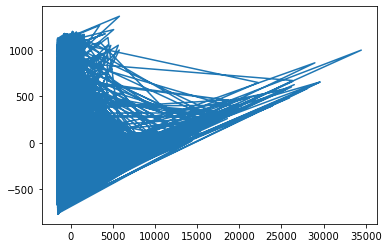

In [31]:
x = data_projected[:, 0]
y = data_projected[:, 1]
plt.plot(x, y)
plt.show()